In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from shutil import copy2
from IPython.core.pylabtools import figsize
from yellowbrick.regressor import CooksDistance

figsize(12, 8)

In [2]:
# Read file
path = "./Normalized/"
name = "sólidos"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')
df.head()

,ENTIDADE,DATA,sólidos
0,P1,2013-01-22,NaN
1,Pb,2013-01-22,NaN
2,Pc,2013-01-22,NaN
3,Pd,2013-01-22,NaN
4,P2,2013-01-22,NaN


In [3]:
# Transformations
df[name] = df[name].map(lambda x: str(x).replace("*", ""))
df[name] = df[name].astype("float64")
df["DATA"] =  pd.to_datetime(df["DATA"], format="%Y-%m-%d")
df["YEAR"] = df["DATA"].map(lambda x: x.year)
df.dtypes

ENTIDADE            object
DATA        datetime64[ns]
sólidos            float64
YEAR                 int64
dtype: object

## Verificando a Distribuição dos Valores

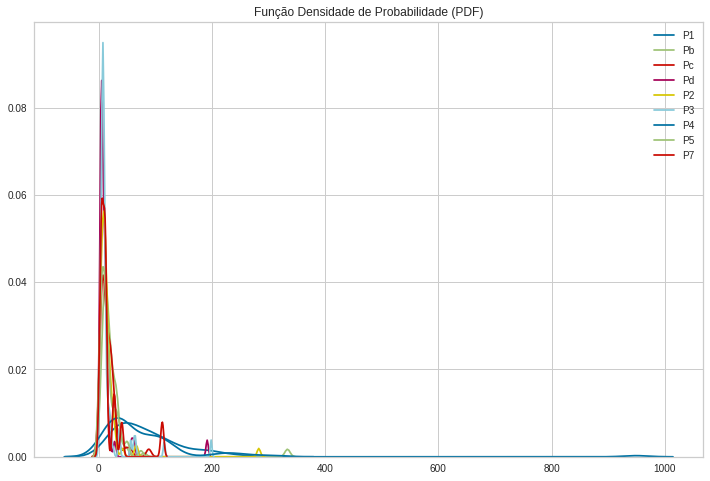

In [4]:
entity_names = df.ENTIDADE.unique().tolist()
entities = [df.loc[df['ENTIDADE'] == entity_name] for entity_name in entity_names]
entities
for entity in entities:
    sns.distplot(entity[[name]].dropna(), hist=False, label=str(entity['ENTIDADE'].unique()[0]))
plt.title("Função Densidade de Probabilidade (PDF)");

## Série Histórica

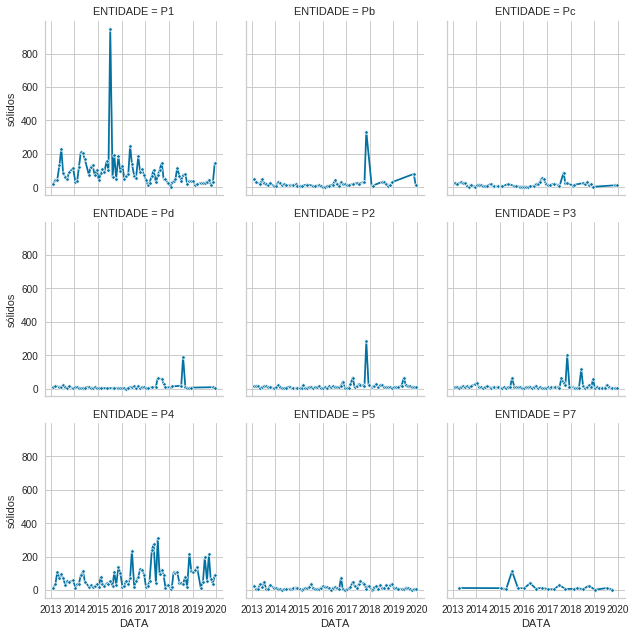

In [5]:
# plt.figure(figsize=(15, 8))
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=3, dropna=True);
g = g.map(sns.lineplot, "DATA", name, marker=".", palette="Set2")

# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)

## Localizando outliers

In [6]:
# P1 = df[df["ENTIDADE"] == "P1"]
# q3 = P1[name].quantile(0.75)
# P1[P1[name] > q3]

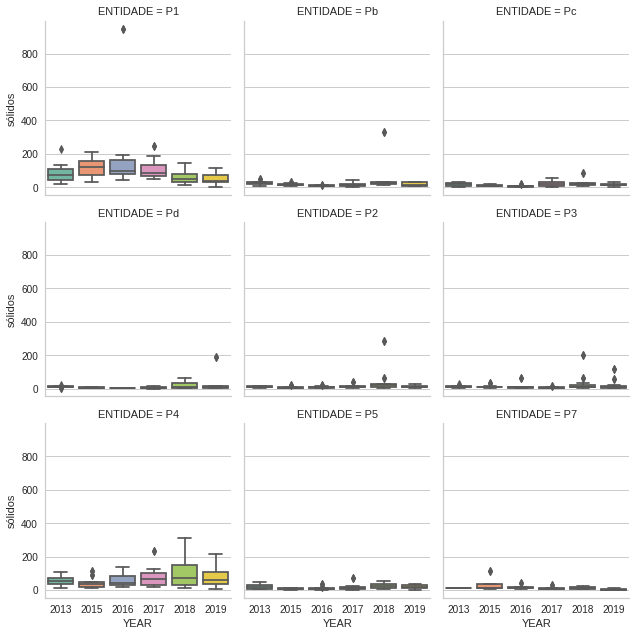

In [7]:
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=3, dropna=True);
g = g.map(sns.boxplot, "YEAR", name, palette="Set2")

In [ ]:
# df.to_csv(f"./Normalized/{name}.csv", encoding='utf8', index=False)
copy2("EDA.ipynb", f"./EDA/EDA_{name}.ipynb")